# Telecommunications dataset for predicting customer churn

In [24]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv("C:/Users/karan/Downloads/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
churn_df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [7]:
churn_df.shape

(200, 10)

In [8]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])

In [9]:
y = np.asarray(churn_df['churn'])

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

In [60]:
lr_model = LogisticRegression(C=0.01, solver='liblinear')

In [61]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_hat = lr_model.predict(X_test)

In [64]:
jaccard_score(y_test,y_hat,pos_label=0)

0.8125

In [119]:
jac_score =[]
c =[]
c_value = np.arange(0.001,1,0.01)
for i in c_value:
    lr_model = LogisticRegression(C=i, solver='liblinear')
    lr_model.fit(X_train,y_train)
    y_hat = lr_model.predict(X_test)
    jac_score.append(jaccard_score(y_test,y_hat,pos_label=0))
    c.append(i)
    
jac_score = np.array(jac_score)
c = np.array(c)

In [120]:
max(jac_score)

0.8125

In [121]:
c[jac_score.argmax()]

0.011

Text(0, 0.5, 'Jaccard Score')

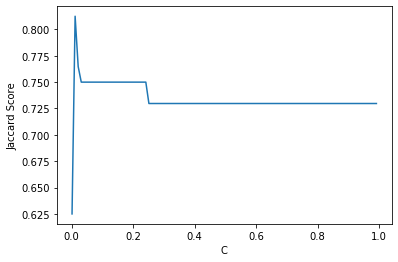

In [124]:
plt.plot(c,jac_score)
plt.xlabel('C')
plt.ylabel('Jaccard Score')